In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns



In [2]:
df = pd.read_csv('Student_Performance_Missing.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


In [3]:
df.isnull().sum()


Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

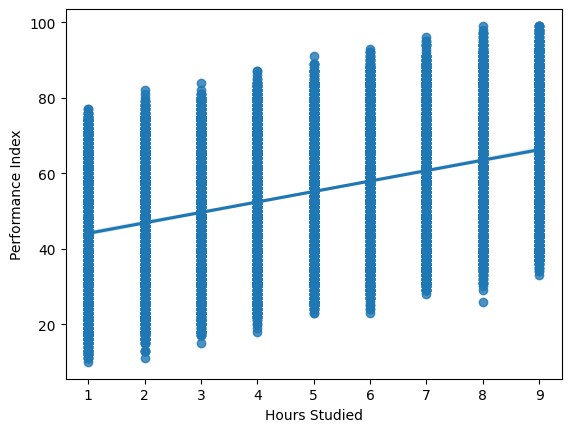

In [4]:
sns.regplot(df, x='Hours Studied' ,y= 'Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>

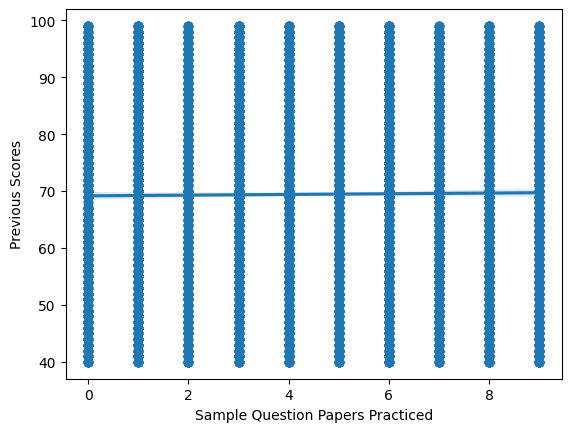

In [6]:
sns.regplot(df,x='Sample Question Papers Practiced',y='Previous Scores')


In [7]:
X= df.drop(columns=['Previous Scores'])
y= df['Previous Scores']

In [8]:
print(X)

      Hours Studied Extracurricular Activities  Sleep Hours  \
0               7.0                        Yes          9.0   
1               4.0                         No          4.0   
2               8.0                        Yes          7.0   
3               5.0                        Yes          5.0   
4               7.0                         No          8.0   
...             ...                        ...          ...   
9995            1.0                        Yes          4.0   
9996            7.0                        Yes          8.0   
9997            6.0                        NaN          8.0   
9998            9.0                        Yes          NaN   
9999            7.0                         No          NaN   

      Sample Question Papers Practiced  Performance Index  
0                                  1.0               91.0  
1                                  2.0               65.0  
2                                  2.0               45.0  
3  

In [9]:
print(y)

0       99.0
1       82.0
2       51.0
3       52.0
4        NaN
        ... 
9995    49.0
9996    64.0
9997    83.0
9998    97.0
9999    74.0
Name: Previous Scores, Length: 10000, dtype: float64


In [10]:
Xtrain , Xtest , ytrain ,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
cat_cols=X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['number']).columns

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [14]:
cat_pipe=Pipeline(
    steps=[
        ('encoder',OneHotEncoder(drop='first'))
    ]
)


In [15]:
num_pipe=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [16]:
preprocessor= ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num',num_pipe,num_cols)
])

In [17]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])